# Introduction to Fourier Transforms with scipy

   Hello! Welcome to this introduction to fourier transforms using scipy! 
   
   Through this tutorial, I will show you what kinds of functions in scipy are useful for this. I'll then show you how to fourier transform some different functions such as a Gaussian, and we'll end with a function you can use to easily transform your functions!

##  Some basics of Fourier Transforms

Fourier transforms are useful in a bevy of scientific applications, with one notable one being image processing. Signals and images from telescope are transformed all the time in astronomy. I've used them often in my research and have found some tricks to implementing them in code.

The mathematical formulation of a one-dimensional continuous fourier transform is given below:

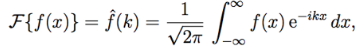

In the case of wanting to transform data, it is most applicable to use what is called a discrete, or __fast__ fourier transform, which applies the fourier transform to a set of data points, turning the integral to a summation. In python, this can be done with a package called scipy __fast__ fourier transform. The discrete one-dimensional transform is given below:


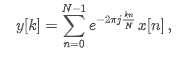

## 1. Import important packages such as numpy, scipy, matplotlib, and the key package scipy.fft

numpy - handles math

matplotlib - handles plotting 

scipy - handles some higher-level math 

scipy.fft - the fast fourier transform package

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

## 2. Make the initial x domain and the gaussian equation

In [6]:
N = 100 # number of points
xdomain = np.linspace(-10, 10, N) # arbitrary, can adjust to whatever is needed

def gaussian_func(x, p):
    """A simple one-dimensional gaussian function, not normalized
    
    parameters:
        p[0] - amplitude
        p[1] - offset
        p[2] - rms width
    """
    
    return p[0]/(p[2]*np.sqrt(2*np.pi)) *np.exp(-(x-p[1])**2 / (2*p[2]**2))

params = np.array([50, 0, 1]) # parameters for the initial gaussian

gaussian = gaussian_func(xdomain, params)

### 2.1 Plot the gaussian using matplotlib

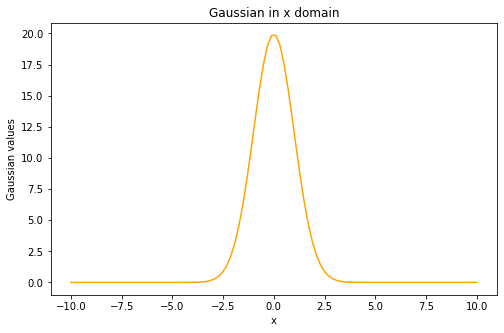

In [21]:
fig = plt.figure(figsize = (8,6)) # create a figure using matplotlib 
plt.title("Gaussian in x domain")
plt.plot(xdomain, gaussian, c = "orange")
plt.xlabel("x")
plt.ylabel("Gaussian values")
plt.show()

## 3. Making the Fourier Transform

C:\Users\Caroline\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[]

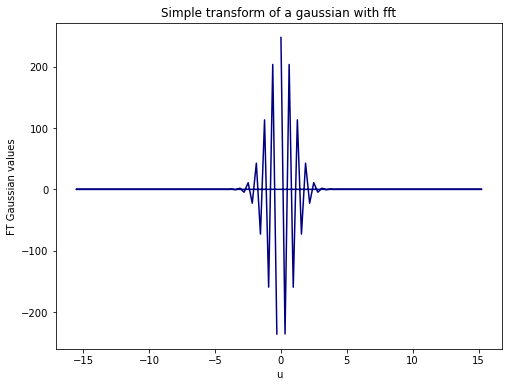

In [22]:
"First, we will try a simple transform using the fast fourier transform function from scipy"
gaussian_ft = fft(gaussian)  

"We also need a domain to plot it in--using fftfreq gives an evenly-spaced domain of size N"
dx = xdomain[1] - xdomain[0]
udomain = 2 * np.pi * fftfreq(N, d=dx)

fig = plt.figure(figsize = (8,6))
plt.title("Simple transform of a gaussian with fft")
plt.plot(udomain, gaussian_ft, c = "navy")
plt.xlabel("u")
plt.ylabel("FT Gaussian values")
plt.plot()

Now, this plot looks weird! While we'd expect to see a simple smooth gaussian with a smaller width, we see a wiggly signal that has a line in the back of it--what's that all about?


As it turns out, it isn't as easy as simply plugging our function into fft(). There are two key points that may complicate things with fourier transforms in scipy:

1. The fourier transform shifts the values
    - This causes that line in the back of the plot; the plot begins to draw in the center, moves to the positive domain values, and then over to the negative, ending back in the center as opposed to going directly left to right
    
    
2. The fourier transform is a collection of complex values. 
    - Python doesn't really know what to do with plotting complex functions, so it takes the real part of the complex values and plots it. (there should be an error that came up, telling you this...)



### 3.1 Dealing with the shifted values

To get a plot that looks like what we actually expect, we need to shift the values. the function fftshift will do it for us -- it swaps the values such that if your domain resulting from fftfreq  starts at zero, applying fftshift to it will move the 0 value to the center and the negative values to the left of the list and the positive to the right.

In [23]:
print("unshifted domain", udomain, "\n")
print("shifted domain", fftshift(udomain))

unshifted domain [  0.           0.31101767   0.62203535   0.93305302   1.24407069
   1.55508836   1.86610604   2.17712371   2.48814138   2.79915905
   3.11017673   3.4211944    3.73221207   4.04322975   4.35424742
   4.66526509   4.97628276   5.28730044   5.59831811   5.90933578
   6.22035345   6.53137113   6.8423888    7.15340647   7.46442414
   7.77544182   8.08645949   8.39747716   8.70849484   9.01951251
   9.33053018   9.64154785   9.95256553  10.2635832   10.57460087
  10.88561854  11.19663622  11.50765389  11.81867156  12.12968924
  12.44070691  12.75172458  13.06274225  13.37375993  13.6847776
  13.99579527  14.30681294  14.61783062  14.92884829  15.23986596
 -15.55088364 -15.23986596 -14.92884829 -14.61783062 -14.30681294
 -13.99579527 -13.6847776  -13.37375993 -13.06274225 -12.75172458
 -12.44070691 -12.12968924 -11.81867156 -11.50765389 -11.19663622
 -10.88561854 -10.57460087 -10.2635832   -9.95256553  -9.64154785
  -9.33053018  -9.01951251  -8.70849484  -8.39747716  -8.086

We apply this in the same way to the gaussian_ft, and plot it

C:\Users\Caroline\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


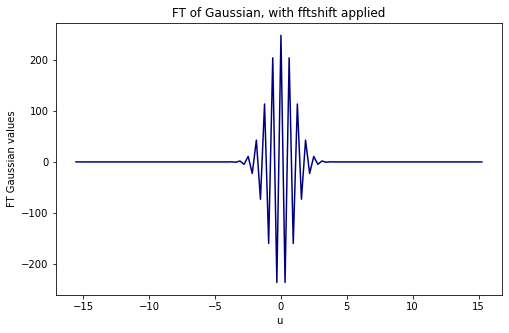

In [24]:
shifted_gaussian_ft = fftshift(gaussian_ft)
shifted_udomain = fftshift(udomain)

plt.figure(figsize = (8,5))
plt.title("FT of Gaussian, with fftshift applied")
plt.plot(shifted_udomain, shifted_gaussian_ft, c = "navy")
plt.xlabel("u")
plt.ylabel("FT Gaussian values")
plt.show()

This looks a lot better! But we still have the issue of the funky amplitude, so let's tackle that next.

### 3.2 Dealing with complex fourier transforms


There are a couple different options for making the fourier transform real, including just taking the real part, taking the absolute value of each data point, or taking the absolute value squared. If you just want a simple idea of a fourier transform and don't need to have a mathematically perfect function, I recommend taking the absolute value of the fourier transform, like so:

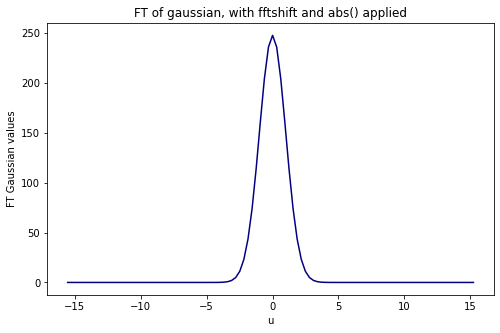

In [25]:
abs_gaussian_ft = abs(fftshift(gaussian_ft)) # absolute value of the shifted fourier transform

fig = plt.figure(figsize = (8,5))
plt.title("FT of gaussian, with fftshift and abs() applied")
plt.plot(shifted_udomain, abs_gaussian_ft, c = "navy")
plt.xlabel("u")
plt.ylabel("FT Gaussian values")
plt.show()

Looking good! However, there is one additional step dealing with the amplitude of the function

### 3.3 Accounting for sampling

When discretely fourier transforming a function like this, the amplitude can be inflated/deflated depending on the sampling used in your initial domain. Therefore one needs to include a factor that accounts for this in the fourier transform.



In [27]:
"""
In section 3 on line 7 we defined a dx--the spacing between values in our initial domain.

Here, we multiply our fourier transform by the factor dx to rescale it.
"""

rescaled_gaussian_ft = abs(fftshift(gaussian_ft)) * dx

For a final check, we can compare this numerical solution with an analytical solution of a gaussian fourier transform. 

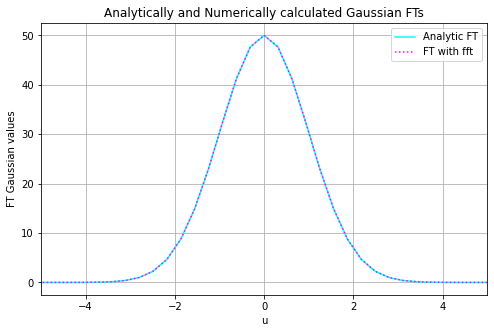

In [33]:
i = 0 +1j

def ft_gaussian_func(u, p):
    """A simple one-dimensional gaussian fourier transform
    
    same parameters:
        p[0] - amplitude
        p[1] - offset
        p[2] - rms width
    """
    
    return abs(p[0]*np.exp(-i*u*p[1])*np.exp(-(p[2]**2)*(u**2)/ 2))

fig = plt.figure(figsize = (8,5))
plt.title("Analytically and Numerically calculated Gaussian FTs")
plt.plot(shifted_udomain, ft_gaussian_func(shifted_udomain, params), label = "Analytic FT", c = "cyan")
plt.plot(shifted_udomain, rescaled_gaussian_ft, label = "FT with fft", linestyle = ':', c = "magenta")
plt.grid()
plt.xlim(-5,5)
plt.legend()
plt.xlabel("u")
plt.ylabel("FT Gaussian values")
plt.show()

And we see that they are the same function! 

## 4 Making a compact function for a fourier transform

For ease of use, we can sum this up in a simple function that takes in a function and domain and spits out its fourier transform!

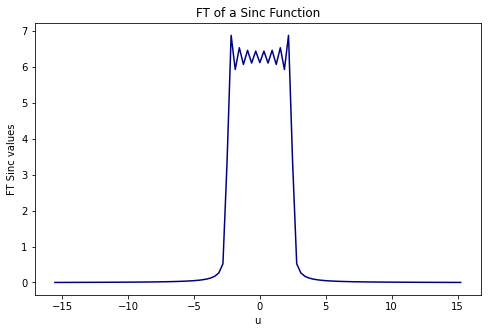

In [34]:
def fourier_transform(domain, func):
    """Given an initial function and an initial domain, return the fourier transform of it"""
    dd = domain[1] - domain[0]
    new_domain = fftshift(2 * np.pi * fftfreq(N, d=dd))
    
    ft = abs(fftshift(fft(func))) * dd
    
    return new_domain, ft
    
# Lets try this with a different function, like a sinc function
def sinc(domain):
    d = 5
    return d * np.sinc((domain * d) / (2 * np.pi)) 

sinc_ft = fourier_transform(xdomain, sinc(xdomain))

fig = plt.figure(figsize = (8,5))
plt.title("FT of a Sinc Function")
plt.plot(sinc_ft[0], sinc_ft[1], c = "navy")
plt.xlabel("u")
plt.ylabel("FT Sinc values")
plt.show()

The fourier transform of a sinc function is a 'Top Hat' function!

## Other useful parameters of fft



The fft function itself has some useful parameters, for instance:
1.  n: int, optional
       - allows you to specify the length of the output
2. axis: int, optional
      - allows you to specify the axis over which to comput FT
3. norm: {“backward”, “ortho”, “forward”}, optional
      - lets you specify where you want the 1/2pi factor to come in
      
This one-dimensional treatment can also of course be built up to two dimensional, using fft2.
      
For a more detailed description, visit the documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft